In [1]:
%%script False
# requirements
numpy
pandas
matplotlib
seaborn
sklearn
spotipy
notebook

Couldn't find program: 'False'


# Imports

In [2]:
# import numpy and pandas to manipulate arrays and dataframes
import numpy as np
import pandas as pd

# import matplotlib and seaborn for data visulaisation
import matplotlib.pyplot as plt
import seaborn as sns

# import sklearn modules to perform relevant ML classification algorithms
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

# import sklearn modules to split and evaluate data and for hyper parameter tuning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# import modules to connect with spotifys database
import spotipy
import spotipy.util as util
from spotipy.oauth2 import SpotifyClientCredentials

# Spotify Data Extraction

In [ ]:
# supply spotify credentials and chosen playlists
# https://developer.spotify.com/dashboard/applications/57759ff19eb04a3db267339986b1379e
cid = ""
secret = ""
username = ""

# playlist ids can be found at the end of the url when viewing a playlist in a web browser
good_playlist_id = ""
bad_playlist_id = ""

In [4]:
# connect to spotify database
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [5]:
def extract_track_features(spotify_username, playlist_id):    
    '''Extract the track ID for each song in a given playlist'''
    
    # extract playlist data from spotify
    playlist_data = sp.user_playlist(spotify_username, playlist_id)
    
    # determine the number of tracks in the playlist
    num_tracks = len(playlist_data['tracks']['items'])
    
    # extract the track ID for each track in the playlist
    track_ids = [playlist_data['tracks']['items'][index]['track']['id'] for index in range(num_tracks)]
    
    # obtain track features for all tracks using their ids
    track_audio_features = sp.audio_features(track_ids)
    
    # repeat process if there are more than 100 tracks
    if len(track_ids) == 100:
        current_track = playlist_data['tracks']
        while current_track['next']:
            current_track = sp.next(current_track)
            num_tracks = len(current_track['items'])
            track_audio_features += sp.audio_features([current_track['items'][index]['track']['id'] for index in range(num_tracks)])

    # create a dataframe from these features
    track_audio_features_df = pd.DataFrame(track_audio_features)
    return track_audio_features_df

In [6]:
# extract features from all tracks in good and bad playlists
good_features = extract_track_features(username, good_playlist_id)
bad_features = extract_track_features(username, bad_playlist_id)

In [7]:
def set_target(dataframe, target_value):
    '''set the response variable for each song based on which playlist it comes from'''
    dataframe['target'] = target_value
    return dataframe

In [8]:
# set the response variable to use for clasification of good and bad tracks in the eye of the user
good_features = set_target(good_features, 1)
bad_features = set_target(bad_features, 0)

In [9]:
x = extract_track_features('mflowerday', '4LLPsq8SiYV2R5lHdhblhG')
print(len(x))
x

103


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.808,0.897,11,-3.712,0,0.0348,0.0469,0.000031,0.3640,0.591,126.026,audio_features,6PQ88X9TkUIAUIZJHW2upE,spotify:track:6PQ88X9TkUIAUIZJHW2upE,https://api.spotify.com/v1/tracks/6PQ88X9TkUIA...,https://api.spotify.com/v1/audio-analysis/6PQ8...,231041,4
1,0.471,0.396,8,-6.654,1,0.0336,0.7700,0.000000,0.0729,0.263,149.609,audio_features,44V6EzbUSYgyfsNiP0FrlA,spotify:track:44V6EzbUSYgyfsNiP0FrlA,https://api.spotify.com/v1/tracks/44V6EzbUSYgy...,https://api.spotify.com/v1/audio-analysis/44V6...,215507,4
2,0.666,0.796,10,-6.967,0,0.1030,0.0492,0.000000,0.0442,0.610,110.108,audio_features,1058fW9H3fZA6QjYCdOBad,spotify:track:1058fW9H3fZA6QjYCdOBad,https://api.spotify.com/v1/tracks/1058fW9H3fZA...,https://api.spotify.com/v1/audio-analysis/1058...,164842,4
3,0.493,0.597,2,-6.944,1,0.3050,0.3370,0.000000,0.0711,0.660,90.096,audio_features,3RjL8AnKslWWPmlNLTJsAU,spotify:track:3RjL8AnKslWWPmlNLTJsAU,https://api.spotify.com/v1/tracks/3RjL8AnKslWW...,https://api.spotify.com/v1/audio-analysis/3RjL...,194680,4
4,0.641,0.551,9,-6.165,1,0.0532,0.1470,0.000000,0.1200,0.417,102.912,audio_features,22eqegdVyWgAQAwLkm7L9b,spotify:track:22eqegdVyWgAQAwLkm7L9b,https://api.spotify.com/v1/tracks/22eqegdVyWgA...,https://api.spotify.com/v1/audio-analysis/22eq...,220891,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,0.718,0.211,8,-6.750,1,0.0375,0.9230,0.000000,0.0722,0.319,139.695,audio_features,3tuYdyfbhxhOBke6fmfqBG,spotify:track:3tuYdyfbhxhOBke6fmfqBG,https://api.spotify.com/v1/tracks/3tuYdyfbhxhO...,https://api.spotify.com/v1/audio-analysis/3tuY...,214286,4
99,0.581,0.604,11,-8.674,1,0.0330,0.6070,0.000000,0.3440,0.661,136.051,audio_features,5oS4eECZJsZ713iQ4caIlD,spotify:track:5oS4eECZJsZ713iQ4caIlD,https://api.spotify.com/v1/tracks/5oS4eECZJsZ7...,https://api.spotify.com/v1/audio-analysis/5oS4...,171251,4
100,0.706,0.714,0,-3.675,1,0.2410,0.1350,0.000000,0.0589,0.454,99.009,audio_features,2Y40dKXeOF4duACkBOAcTu,spotify:track:2Y40dKXeOF4duACkBOAcTu,https://api.spotify.com/v1/tracks/2Y40dKXeOF4d...,https://api.spotify.com/v1/audio-analysis/2Y40...,211504,4
101,0.333,0.409,5,-7.841,1,0.0396,0.9290,0.000000,0.1540,0.518,65.573,audio_features,2lUB3DmQbrQrYeGWc3PfcY,spotify:track:2lUB3DmQbrQrYeGWc3PfcY,https://api.spotify.com/v1/tracks/2lUB3DmQbrQr...,https://api.spotify.com/v1/audio-analysis/2lUB...,149526,4


In [10]:
"""# extract the track ID for each track in the playlist
track_ids = [playlist_data['tracks']['items'][index]['track']['id'] for index in range(num_tracks)]

# obtain track features for all tracks using their ids
track_audio_features = sp.audio_features(track_ids)

# create a dataframe from these features
track_audio_features_df = pd.DataFrame(track_audio_features)
return track_audio_features_df"""

playlist_data = sp.user_playlist('mflowerday', '4LLPsq8SiYV2R5lHdhblhG')

# determine the number of tracks in the playlist
num_tracks = len(playlist_data['tracks']['items'])
playlist_data['tracks'].keys()#['items']

dict_keys(['href', 'items', 'limit', 'next', 'offset', 'previous', 'total'])

# Data Exploration

In [11]:
# inspect our data
good_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.798,0.433,5,-17.178,0,0.0538,0.244,0.909,0.0988,0.958,138.906,audio_features,2MRqleq1CRK4W6M4GLEty9,spotify:track:2MRqleq1CRK4W6M4GLEty9,https://api.spotify.com/v1/tracks/2MRqleq1CRK4...,https://api.spotify.com/v1/audio-analysis/2MRq...,172664,4,1
1,0.788,0.473,0,-15.841,0,0.0473,0.319,0.682,0.1160,0.928,141.943,audio_features,3X8guTSbsClprONxbSAMaE,spotify:track:3X8guTSbsClprONxbSAMaE,https://api.spotify.com/v1/tracks/3X8guTSbsClp...,https://api.spotify.com/v1/audio-analysis/3X8g...,169041,4,1
2,0.717,0.513,11,-16.535,1,0.0591,0.245,0.886,0.1050,0.943,182.073,audio_features,7Ih3ohVIFuaoVwo5EZoLqd,spotify:track:7Ih3ohVIFuaoVwo5EZoLqd,https://api.spotify.com/v1/tracks/7Ih3ohVIFuao...,https://api.spotify.com/v1/audio-analysis/7Ih3...,179351,4,1
3,0.803,0.199,5,-25.781,1,0.0515,0.804,0.858,0.1030,0.464,94.981,audio_features,3SJ0MlI53CHZZyEF6lWnLz,spotify:track:3SJ0MlI53CHZZyEF6lWnLz,https://api.spotify.com/v1/tracks/3SJ0MlI53CHZ...,https://api.spotify.com/v1/audio-analysis/3SJ0...,171828,4,1
4,0.698,0.220,6,-18.455,1,0.0651,0.388,0.738,0.0902,0.782,174.005,audio_features,78ErfFFn7bFAZayAWshVaN,spotify:track:78ErfFFn7bFAZayAWshVaN,https://api.spotify.com/v1/tracks/78ErfFFn7bFA...,https://api.spotify.com/v1/audio-analysis/78Er...,185517,4,1


In [12]:
bad_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,target
0,0.476,0.941,1,-3.978,1,0.0606,0.000011,0.000006,0.0822,0.524,84.986,audio_features,6IHYWWmVyVXVk8b8rBYy9z,spotify:track:6IHYWWmVyVXVk8b8rBYy9z,https://api.spotify.com/v1/tracks/6IHYWWmVyVXV...,https://api.spotify.com/v1/audio-analysis/6IHY...,209162,4,0
1,0.394,0.866,2,-7.225,1,0.0615,0.000020,0.057500,0.2360,0.250,136.463,audio_features,3Ms2nBYdWz7lEyx35othR4,spotify:track:3Ms2nBYdWz7lEyx35othR4,https://api.spotify.com/v1/tracks/3Ms2nBYdWz7l...,https://api.spotify.com/v1/audio-analysis/3Ms2...,216640,4,0
2,0.250,0.946,2,-3.712,0,0.1360,0.009630,0.000805,0.2890,0.349,160.878,audio_features,5YezFqlDub2RcIDSCPcpu1,spotify:track:5YezFqlDub2RcIDSCPcpu1,https://api.spotify.com/v1/tracks/5YezFqlDub2R...,https://api.spotify.com/v1/audio-analysis/5Yez...,349736,4,0
3,0.480,0.940,3,-4.456,0,0.0329,0.000098,0.000021,0.0338,0.620,107.994,audio_features,4TCZ8OiB35UIpgwsrxhJsF,spotify:track:4TCZ8OiB35UIpgwsrxhJsF,https://api.spotify.com/v1/tracks/4TCZ8OiB35UI...,https://api.spotify.com/v1/audio-analysis/4TCZ...,241519,4,0
4,0.541,0.875,1,-4.903,1,0.0326,0.000013,0.051300,0.2200,0.334,109.994,audio_features,5BumjEZq3wTMahFXuKnWHr,spotify:track:5BumjEZq3wTMahFXuKnWHr,https://api.spotify.com/v1/tracks/5BumjEZq3wTM...,https://api.spotify.com/v1/audio-analysis/5Bum...,363904,4,0


In [13]:
good_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1177 entries, 0 to 1176
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1177 non-null   float64
 1   energy            1177 non-null   float64
 2   key               1177 non-null   int64  
 3   loudness          1177 non-null   float64
 4   mode              1177 non-null   int64  
 5   speechiness       1177 non-null   float64
 6   acousticness      1177 non-null   float64
 7   instrumentalness  1177 non-null   float64
 8   liveness          1177 non-null   float64
 9   valence           1177 non-null   float64
 10  tempo             1177 non-null   float64
 11  type              1177 non-null   object 
 12  id                1177 non-null   object 
 13  uri               1177 non-null   object 
 14  track_href        1177 non-null   object 
 15  analysis_url      1177 non-null   object 
 16  duration_ms       1177 non-null   int64  


In [14]:
bad_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      861 non-null    float64
 1   energy            861 non-null    float64
 2   key               861 non-null    int64  
 3   loudness          861 non-null    float64
 4   mode              861 non-null    int64  
 5   speechiness       861 non-null    float64
 6   acousticness      861 non-null    float64
 7   instrumentalness  861 non-null    float64
 8   liveness          861 non-null    float64
 9   valence           861 non-null    float64
 10  tempo             861 non-null    float64
 11  type              861 non-null    object 
 12  id                861 non-null    object 
 13  uri               861 non-null    object 
 14  track_href        861 non-null    object 
 15  analysis_url      861 non-null    object 
 16  duration_ms       861 non-null    int64  
 1

In [15]:
good_features.nunique()

danceability         462
energy               601
key                   12
loudness            1117
mode                   2
speechiness          542
acousticness         709
instrumentalness     593
liveness             330
valence              656
tempo               1151
type                   1
id                  1175
uri                 1175
track_href          1175
analysis_url        1175
duration_ms          766
time_signature         4
target                 1
dtype: int64

In [16]:
bad_features.nunique()

danceability        401
energy              263
key                  12
loudness            786
mode                  2
speechiness         520
acousticness        705
instrumentalness    683
liveness            510
valence             513
tempo               827
type                  1
id                  838
uri                 838
track_href          838
analysis_url        838
duration_ms         801
time_signature        4
target                1
dtype: int64

## Feature Selection
- 'type' has only one observation, 'audio_features', which is not useful for our use case and so can be removed.
- 'id', 'uri', 'track_href' and 'analysis_url' are all uniuque to each track which is not useful for our use case and so can be removed.

In [17]:
def feature_selection(dataframe):
    '''remove features that will not add value to modelling'''
    dataframe = dataframe.drop(['type', 'id', 'uri', 'track_href', 'analysis_url'], axis=1)
    return dataframe

In [18]:
good_features = feature_selection(good_features)
bad_features = feature_selection(bad_features)

## Exploring Distributions
The remaining variables can be classified as follows:

### Continuous variables
- danceability
- energy
- loudness
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
- duration_ms

### Binary Variables
- mode
- target (created during program)

### Categorical Variables
- key (these can be further grouped)
- time_signature
<br><br><br>
We can visualise Continuous distributions well using Histograms and categorical variables using count plots

In [19]:
def plot_hist(feature):
    '''Plot histograms comparing the distribution good and bad continuous song features'''
    
    # determin an appropriate binning for the hisogram
    min_value = min(min(good_features[feature]), min(bad_features[feature]))
    max_value = max(max(good_features[feature]), max(bad_features[feature]))
    bins = np.linspace(min_value, max_value, 20)
    
    # plot the histograms
    plt.hist(good_features[feature], bins, alpha=0.5, label='good')
    plt.hist(bad_features[feature], bins, alpha=0.5, label='bad')
    plt.legend(loc='upper right')
    plt.title(feature)
    plt.show()

In [20]:
def plot_hists(dataframe):
    '''Plot comparrison histograms for each continuous feature in a dataframe'''
    for feature in dataframe.columns:
        if dataframe[feature].dtype == 'float64' or feature == 'duration_ms':
            plot_hist(feature)

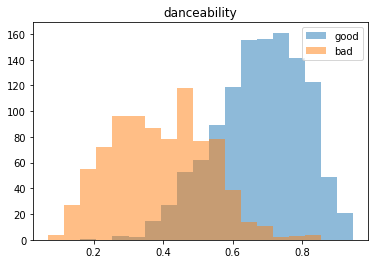

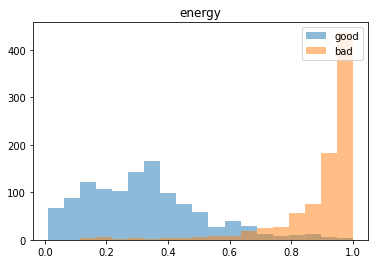

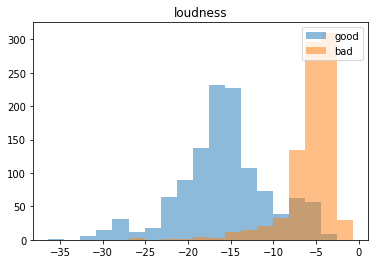

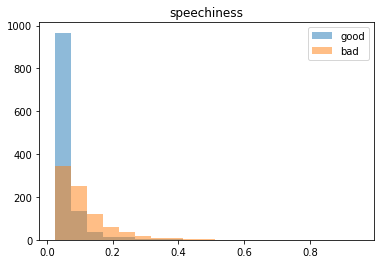

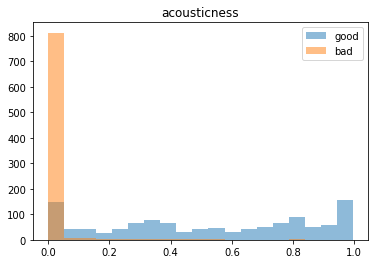

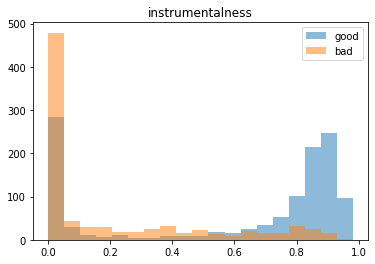

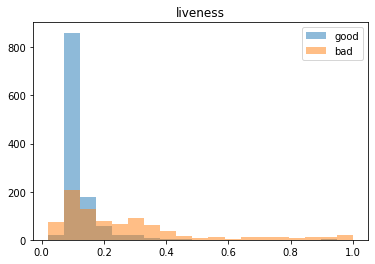

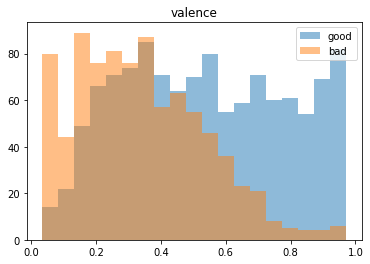

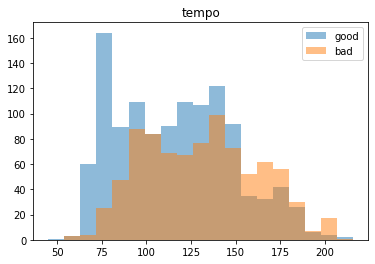

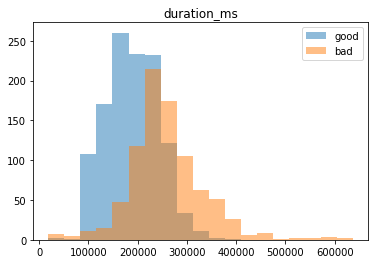

In [21]:
plot_hists(good_features)

In [22]:
# combine datasets to be used in countplots
combined_features = pd.concat([good_features, bad_features], axis=0)

In [23]:
def plot_countplot(dataframe, feature):
    '''plots and labels a countplot of the chosen feature in the chosen dataframe'''
    sns.countplot(x=feature, data=dataframe, hue='target')
    plt.title(feature)
    plt.show()

In [24]:
def plot_countplots(dataframe):
    '''Plot countplots for each categorical feature in a dataframe'''
    for feature in dataframe.columns:
        if feature in ['mode', 'key', 'time_signature', 'target']:
            print(dataframe[feature].dtype)
            plot_countplot(dataframe, feature)

int64


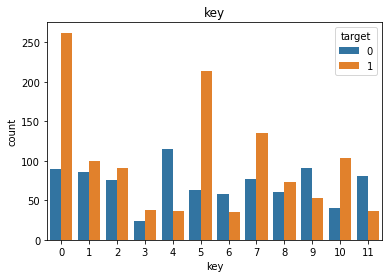

int64


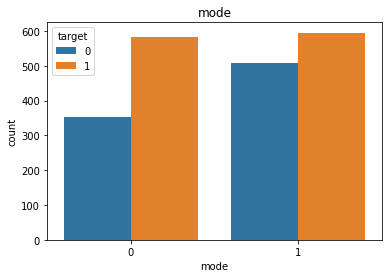

int64


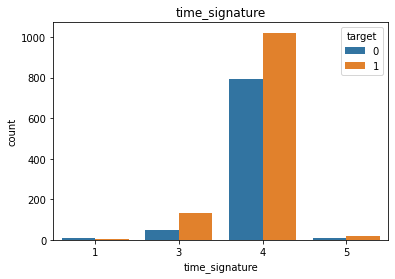

int64


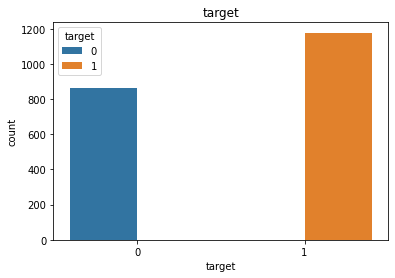

In [25]:
plot_countplots(combined_features)

## Balancing our dataset
This program allows the user to use 'good' and 'bad' playlists of different lengths, because of this we may end up with unbalanced data being fed into our models, this would lead to bias in our model toward the class that has more observations (the playlist with more songs).

One method to counter this is to use Resampling (could be under or over sampling)
Reference: https://towardsdatascience.com/having-an-imbalanced-dataset-here-is-how-you-can-solve-it-1640568947eb 


In [89]:
# downsample dataframe to balance data (don't allow replacement)
def downsample(good_features, bad_features):
    '''takes potentially imballenced good and bad features dataframes as input
        downsamples them without replacement
        '''
    
    # find the number of samples in the 'shorter' playlist
    num_samples = min(len(good_features), len(bad_features))
                      
    good_features_sample = good_features.sample(n=num_samples, random_state=42)
    bad_features_sample = bad_features.sample(n=num_samples, random_state=42)
    
    return good_features_sample, bad_features_sample

In [90]:
good_features_downsample, bad_features_downsample = downsample(good_features, bad_features)

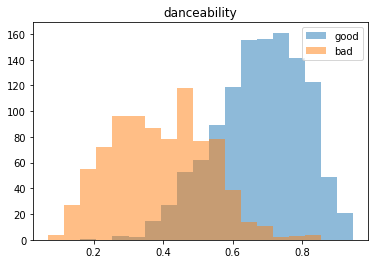

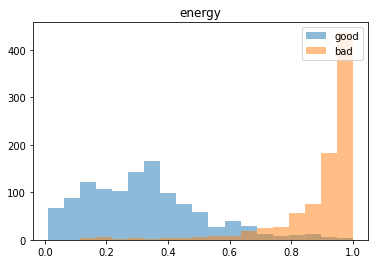

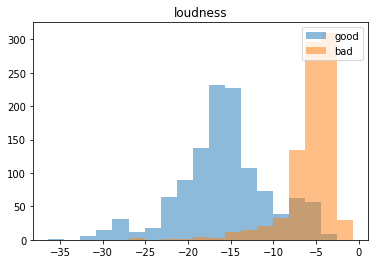

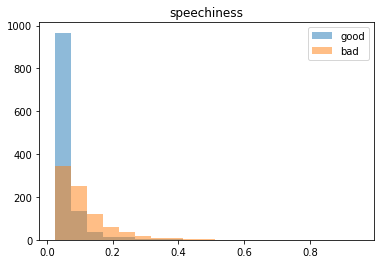

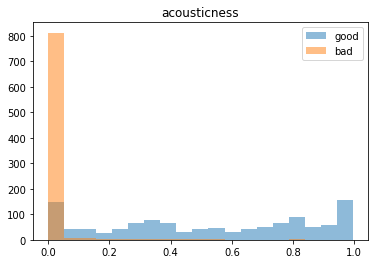

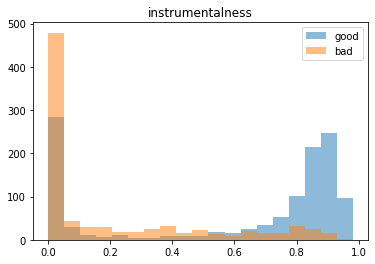

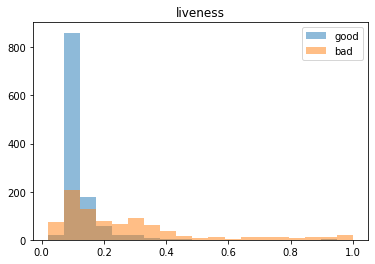

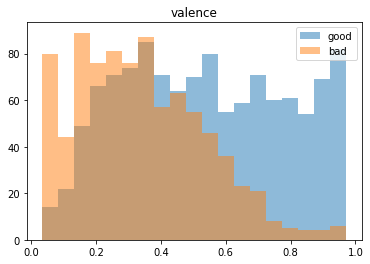

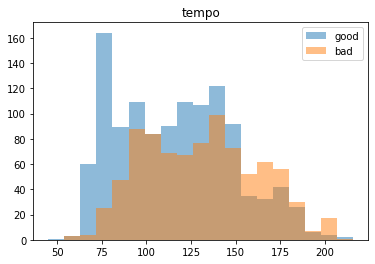

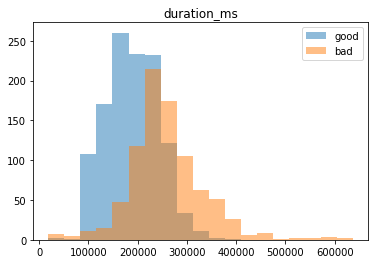

In [91]:
plot_hists(good_features_downsample)

In [92]:
combined_features_downsample = pd.concat([good_features_downsample, bad_features_downsample], axis=0)

int64


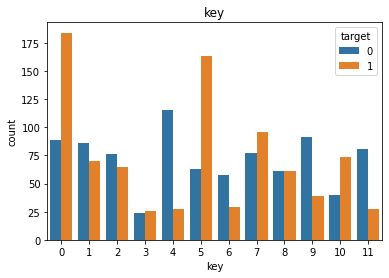

int64


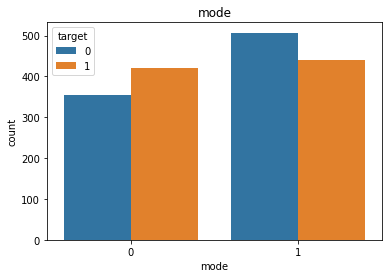

int64


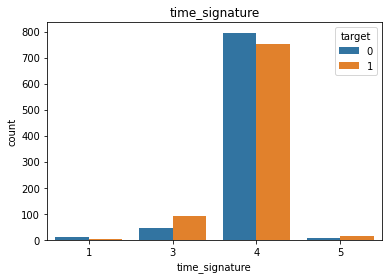

int64


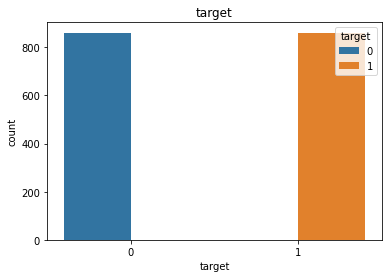

In [93]:
plot_countplots(combined_features_downsample)

In [88]:
# upsample dataframe to balance data (allow replacement in the 'longer' playlist)
def upsample(good_features, bad_features):
    '''takes potentially imballenced good and bad features dataframes as input
        downsamples them without replacement
        '''
    
    # find the number of samples in the 'shorter' playlist
    num_samples = max(len(good_features), len(bad_features))
    
    # determine which playlist has more songs
    good_features_shortest = True
    if len(good_features) > len(bad_features):
        good_features_shortest = False
    bad_features_shortest = not good_features_shortest
                      
    good_features_sample = good_features.sample(n=num_samples, random_state=42, replace=good_features_shortest)
    bad_features_sample = bad_features.sample(n=num_samples, random_state=42, replace=bad_features_shortest)
    
    return good_features_sample, bad_features_sample

In [83]:
good_features_upsample, bad_features_upsample = downsample(good_features, bad_features)

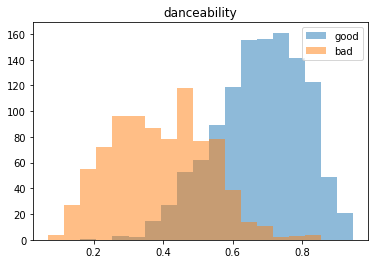

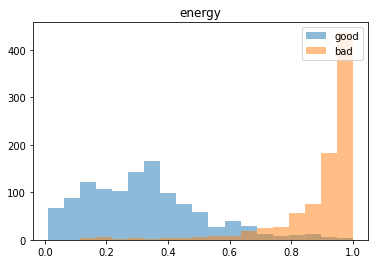

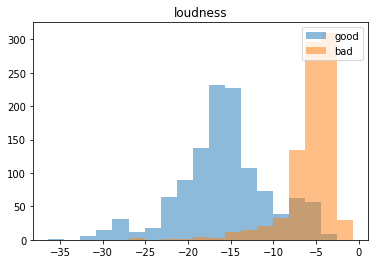

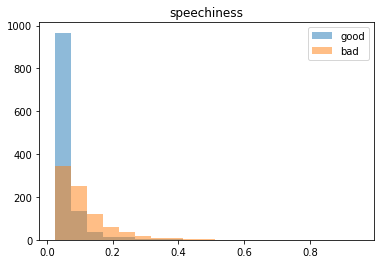

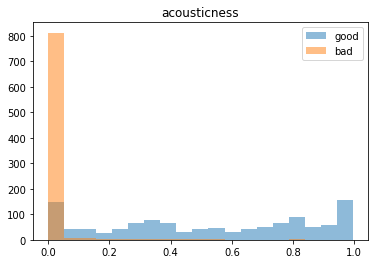

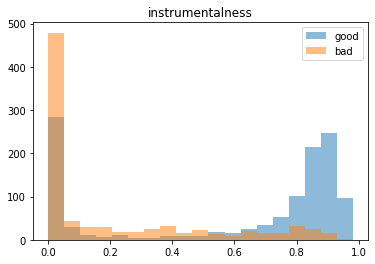

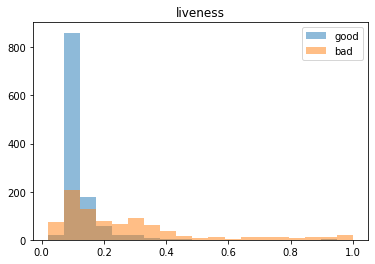

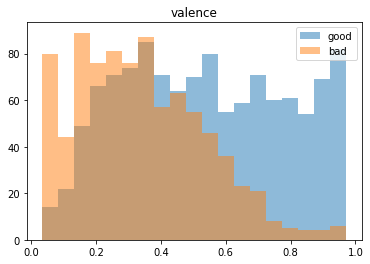

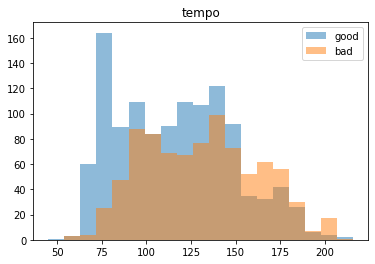

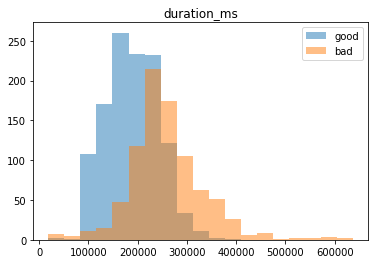

In [84]:
plot_hists(good_features_upsample)

In [85]:
combined_features_upsample = pd.concat([good_features_upsample, bad_features_upsample], axis=0)

int64


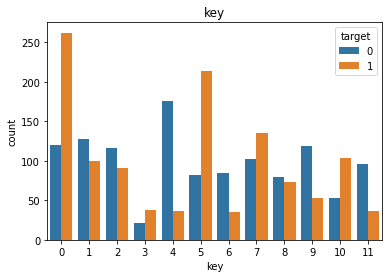

int64


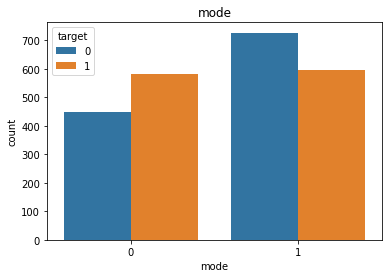

int64


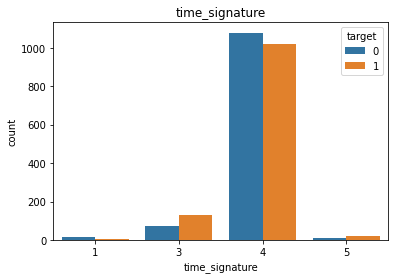

int64


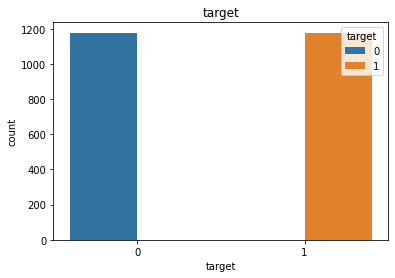

In [86]:
plot_countplots(combined_features_upsample)